In [1]:
import numpy as np
import pandas as pd
import os
import tqdm
import pickle
import json

import matplotlib.pyplot as plt

### Combine batched csv's

In [2]:
# scratch_dir = r'/ifs/scratch/jls106_gp/nhw2114/safegraph/'
scratch_dir = 'G://My Drive/Research/Safegraph/scratch/20221205/'

import glob

csv_files = glob.glob(f'{scratch_dir}/*.csv')
pickle_files = glob.glob(f'{scratch_dir}/*.pickle')

In [3]:
len(csv_files)

9

Bad JSON files that could not be loaded

In [4]:
import pickle

bad_files = []
for picklepath in pickle_files:
    with open(picklepath, 'rb') as f:
        bad_files.append(pickle.load(f))

bad_files = [item for sublist in bad_files for item in sublist]
bad_files

['New York,NYfrom2021-11-08to2021-11-15PART70.json',
 'New York,NYfrom2021-06-14to2021-06-21PART51.json',
 'New York,NYfrom2021-07-05to2021-07-12PART138.json',
 'New York,NYfrom2021-07-12to2021-07-19PART7.json',
 'New York,NYfrom2021-11-01to2021-11-08PART49.json']

In [5]:
len(bad_files)

5

In [6]:
df_list = []

for filename in csv_files:
    df = pd.read_csv(filename, header=0, index_col=0)
    df_list.append(df)

df = pd.concat(df_list, axis=0)

In [7]:
df.iloc[495:550,:]

,node.placekey,node.safegraph_core.naics_code,node.safegraph_core.location_name,node.safegraph_core.top_category,node.safegraph_core.sub_category,node.safegraph_geometry.wkt_area_sq_meters,day_0_visits,day_1_visits,day_2_visits,day_3_visits,...,median_dwell,<5,5-10,11-20,21-60,61-120,121-240,>240,start,end
495,22z-222@627-wc6-y7q,448140.0,Gucci,Clothing Stores,Family Clothing Stores,513.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
496,zzw-23h@627-s8h-vpv,722511.0,Cleo,Restaurants and Other Eating Places,Full-Service Restaurants,212.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
497,zzy-223@627-wg3-sdv,485113.0,MTA New York City Transit AV L E 28 ST,Urban Transit Systems,Bus and Other Motor Vehicle Transit Systems,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
498,225-225@627-s8j-cqz,453110.0,Flower City & Porcelain Town,Florists,Florists,14460.0,1.0,1.0,3.0,0.0,...,282.0,1.0,1.0,0.0,0.0,0.0,2.0,5.0,2018-01-01,2018-01-08
499,227-228@627-s8r-9fz,448210.0,Bennett Footwear Group,Shoe Stores,Shoe Stores,14988.0,0.0,1.0,1.0,0.0,...,18.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,2018-01-01,2018-01-08
0,zzw-222@627-s4m-vfz,621330.0,Constance Cotter Weisenseel MSW LMSW,Offices of Other Health Practitioners,Offices of Mental Health Practitioners (except...,4007.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
1,222-22b@627-s8j-q2k,446110.0,CVS,Health and Personal Care Stores,Pharmacies and Drug Stores,202.0,1.0,1.0,13.0,6.0,...,10.0,1.0,14.0,9.0,0.0,0.0,2.0,3.0,2018-01-01,2018-01-08
2,zzw-227@627-s8j-ht9,621320.0,Economy Best Vision And Hearing,Offices of Other Health Practitioners,Offices of Optometrists,12486.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
3,224-222@627-s4t-3nq,531110.0,Apartments at 515 517 W 139th St,Lessors of Real Estate,Lessors of Residential Buildings and Dwellings,327.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01,2018-01-08
4,234-225@627-s8j-3nq,488410.0,01 All Day Emergency Towing,Support Activities for Road Transportation,Motor Vehicle Towing,12816.0,0.0,0.0,0.0,0.0,...,8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2018-01-01,2018-01-08


In [10]:
df.shape

n = df.shape[0]

n

18821974

18,821,974 POI-weeks

In [9]:
count_na_cols = ['node.safegraph_geometry.wkt_area_sq_meters', 'raw_visitor_counts', 'raw_visitor_counts', 'median_dwell']

for col in count_na_cols:
    print(f"{col} has {n - sum(df.loc[:,col].isna())} rows that are not NaN")

node.safegraph_geometry.wkt_area_sq_meters has 16075038 rows that are not NaN
raw_visitor_counts has 5360882 rows that are not NaN
raw_visitor_counts has 5360882 rows that are not NaN
median_dwell has 5360882 rows that are not NaN


In [ ]:
5360882 / n * 100

TODO: Check if NaNs are true zeros or visits just weren't tracked...

In [11]:
no_nan_df = df[~df['raw_visitor_counts'].isnull()]

In [12]:
sum(no_nan_df['raw_visit_counts'] == 0)

0

In [13]:
for col in count_na_cols:
    print(f"{col} has {sum(no_nan_df.loc[:,col].isna())} rows that are NaN")

node.safegraph_geometry.wkt_area_sq_meters has 0 rows that are NaN
raw_visitor_counts has 0 rows that are NaN
raw_visitor_counts has 0 rows that are NaN
median_dwell has 0 rows that are NaN


In [14]:
no_nan_df.shape

(5360882, 25)

In [42]:
5360882 - 5111981

248901

In [15]:
sum(no_nan_df['node.safegraph_core.naics_code'].isna())

760

In [16]:
no_nan_df = no_nan_df[~no_nan_df['node.safegraph_core.naics_code'].isnull()]

In [17]:
no_nan_df['node.safegraph_core.naics_code'] = no_nan_df['node.safegraph_core.naics_code'].astype(int).astype(str)

In [18]:
from collections import Counter

naics_code_lengths = no_nan_df['node.safegraph_core.naics_code'].apply(len).tolist()

Counter(naics_code_lengths)

Counter({6: 4977967, 4: 325067, 5: 43005, 3: 14083})

In [19]:
len(np.unique(no_nan_df['node.safegraph_core.naics_code']))

291

In [20]:
len(np.unique(no_nan_df['node.placekey']))

49531

291 unique NAICS codes across 49,531 unique POIs

In [21]:
no_nan_df['density'] = no_nan_df['raw_visit_counts'] / no_nan_df['node.safegraph_geometry.wkt_area_sq_meters'] 

In [22]:
summary_df = no_nan_df[['node.safegraph_core.top_category', 'density', 'median_dwell']].groupby('node.safegraph_core.top_category').describe().unstack(1)
summary_df.to_csv('summary_stats.csv')

<AxesSubplot:ylabel='Frequency'>

<Figure size 1800x600 with 0 Axes>

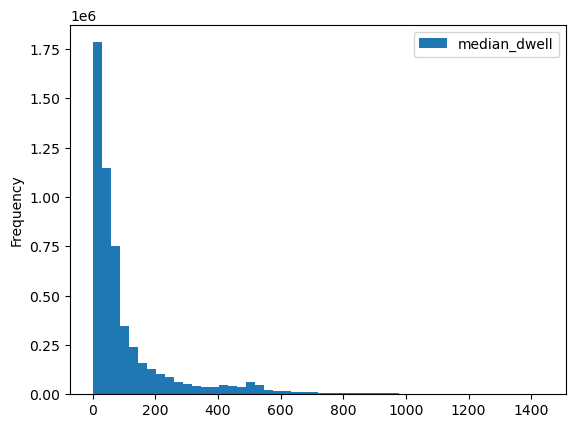

In [23]:
plt.figure(figsize=(18,6))
no_nan_df[['median_dwell']].plot.hist(bins=50)

In [24]:
np.sum(no_nan_df[['median_dwell']] < 10) / len(no_nan_df)

median_dwell    0.059817
dtype: float64

Not bimodal... but I think 300 minutes (5 hours) is a reasonable cutoff time

<AxesSubplot:ylabel='Frequency'>

<Figure size 1800x600 with 0 Axes>

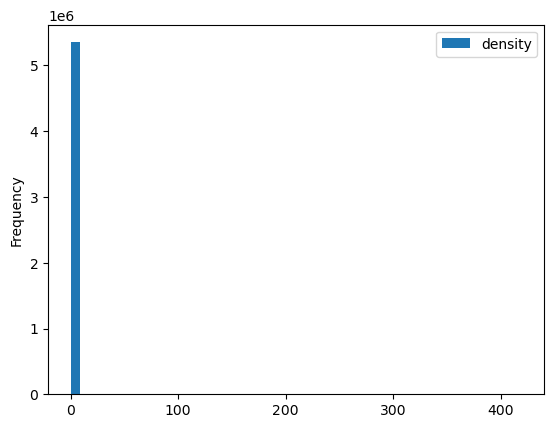

In [25]:
plt.figure(figsize=(18,6))
no_nan_df[['density']].plot.hist(bins=50)

Text(0, 0.5, 'Dwell time (min)')

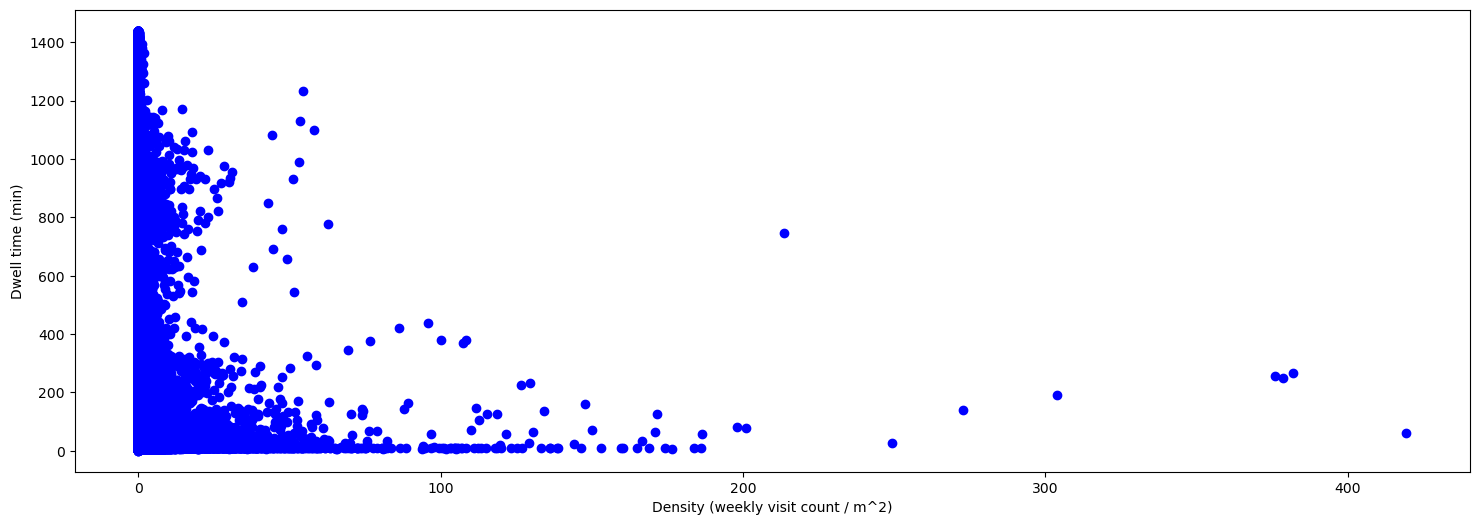

In [32]:
plt.figure(figsize=(18,6))
plt.plot(no_nan_df[['density']], no_nan_df[['median_dwell']], 'bo')
plt.xlabel('Density (weekly visit count / m^2)')
plt.ylabel('Dwell time (min)')

In [33]:
no_nan_df.loc[no_nan_df['density'] > 150, :].to_csv('large_density.csv', index=False)

In [35]:
no_nan_df.loc[no_nan_df['median_dwell'] > 500, :].to_csv('large_dwell.csv', index=False)

In [40]:
removed_outlier_df = no_nan_df.loc[(no_nan_df['median_dwell'] < 500) & (no_nan_df['density'] < 150),:]

In [45]:
removed_outlier_df['start'] = pd.to_datetime(removed_outlier_df.start, format='%Y-%m-%d')
removed_outlier_df['end'] = pd.to_datetime(removed_outlier_df.start, format='%Y-%m-%d')

C:\Users\hyone\AppData\Local\Temp\ipykernel_31288\626609350.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outlier_df['start'] = pd.to_datetime(removed_outlier_df.start, format='%Y-%m-%d')
C:\Users\hyone\AppData\Local\Temp\ipykernel_31288\626609350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outlier_df['end'] = pd.to_datetime(removed_outlier_df.start, format='%Y-%m-%d')


In [50]:
df_2019 = removed_outlier_df.loc[(removed_outlier_df.start > '2019-01-01') & (removed_outlier_df.start < '2019-12-31'),:]

In [56]:
df_2019.head()

,node.placekey,node.safegraph_core.naics_code,node.safegraph_core.location_name,node.safegraph_core.top_category,node.safegraph_core.sub_category,node.safegraph_geometry.wkt_area_sq_meters,day_0_visits,day_1_visits,day_2_visits,day_3_visits,...,<5,5-10,11-20,21-60,61-120,121-240,>240,start,end,density
6,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,5.0,4.0,8.0,6.0,...,1.0,12.0,19.0,5.0,3.0,3.0,3.0,2019-01-07,2019-01-07,0.647887
9,22h-222@627-s8j-975,442110,Stickley Audi & Co,Furniture Stores,Furniture Stores,304.0,0.0,1.0,2.0,1.0,...,1.0,2.0,3.0,0.0,0.0,0.0,2.0,2019-01-07,2019-01-07,0.026316
15,222-225@627-wbz-3qz,611310,Brooklyn College Graduate Center For Worker Ed...,"Colleges, Universities, and Professional Schools","Colleges, Universities, and Professional Schools",11473.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2019-01-07,2019-01-07,0.000174
17,22d-223@627-s8q-tjv,712110,American Craft Museum,"Museums, Historical Sites, and Similar Institu...",Museums,1353.0,11.0,25.0,25.0,19.0,...,2.0,3.0,7.0,42.0,45.0,26.0,18.0,2019-01-07,2019-01-07,0.105691
19,22c-225@627-s4n-skf,722410,Stella & Fly,Drinking Places (Alcoholic Beverages),Drinking Places (Alcoholic Beverages),410.0,1.0,1.0,1.0,0.0,...,0.0,2.0,2.0,1.0,1.0,0.0,3.0,2019-01-07,2019-01-07,0.021951


In [61]:
df_2019_mean = df_2019.groupby('node.placekey')['density', 'median_dwell'].mean()

C:\Users\hyone\AppData\Local\Temp\ipykernel_31288\526604028.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_2019_mean = df_2019.groupby('node.placekey')['density', 'median_dwell'].mean()


In [70]:
df_2019_mean.to_csv('df_2019_mean.csv', index=False)

In [62]:
X = df_2019_mean[['density','median_dwell']]

In [63]:
X.shape

(32882, 2)

In [64]:
X.describe()

,density,median_dwell
count,3.288200e+04,32882.000000
mean,2.135124e-01,100.499871
std,9.750538e-01,100.589152
min,2.943466e-07,4.000000
25%,1.926411e-03,33.221154
50%,1.345297e-02,65.552885
75%,1.021440e-01,130.000000
max,6.723077e+01,499.000000


In [65]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 6000000

Text(0.5, 1.0, 'Density vs Median Dwell Time (2019 averages)')

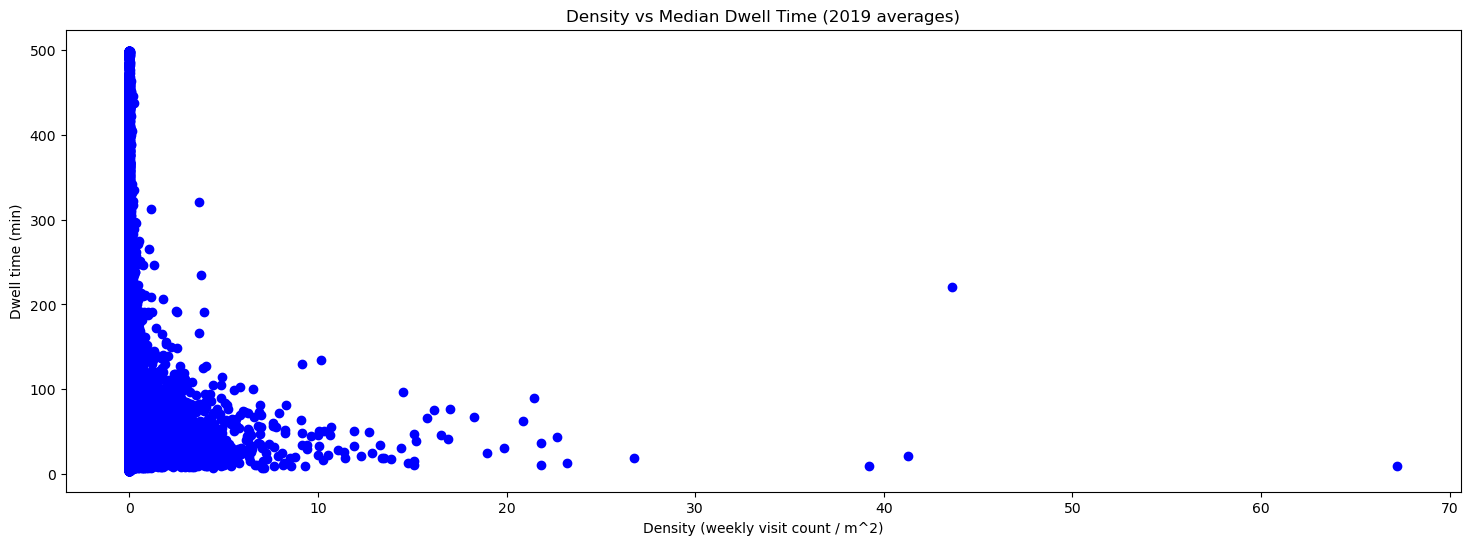

In [66]:
plt.figure(figsize=(18,6))
plt.plot(X.iloc[:,0], X.iloc[:,1], 'bo')
plt.xlabel('Density (weekly visit count / m^2)')
plt.ylabel('Dwell time (min)')
plt.title('Density vs Median Dwell Time (2019 averages)')


Text(0.5, 1.0, 'Density vs Median Dwell Time Log Transform (2019 averages)')

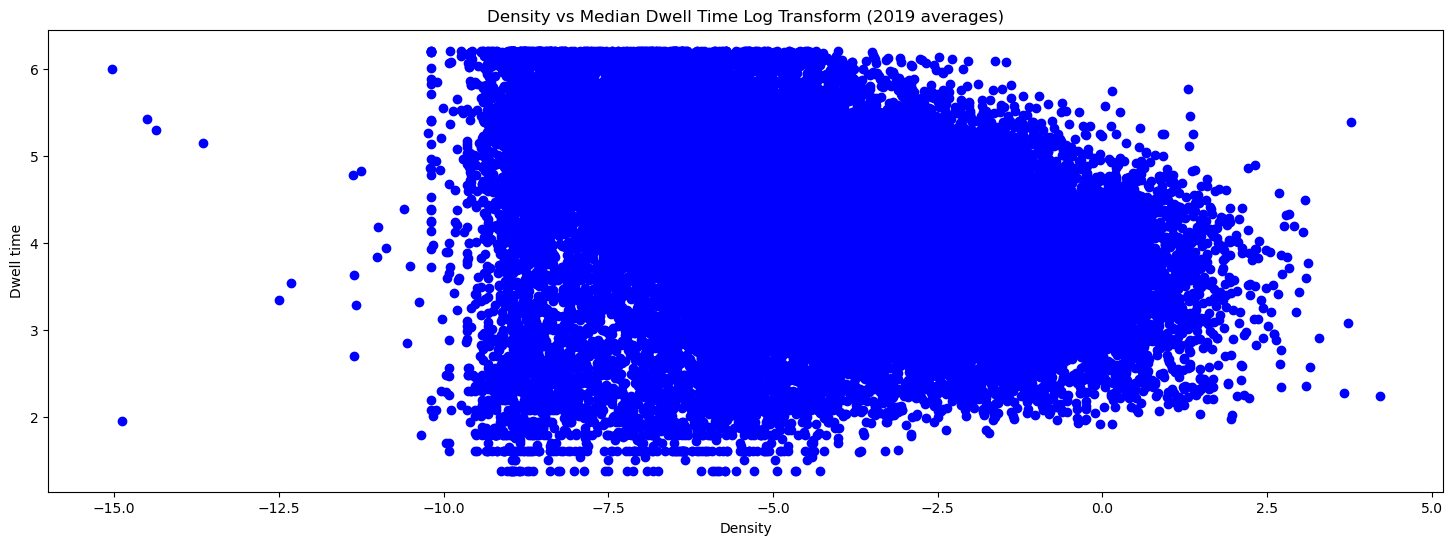

In [137]:
X_log = np.log(X)

plt.figure(figsize=(18,6))
plt.plot(X_log['density'], X_log['median_dwell'], 'bo')
plt.xlabel('Density')
plt.ylabel('Dwell time')
plt.title('Density vs Median Dwell Time Log Transform (2019 averages)')

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_standardized = scaler.fit_transform(X)

Text(0.5, 1.0, 'Density vs Median Dwell Time Z score (2019 averages)')

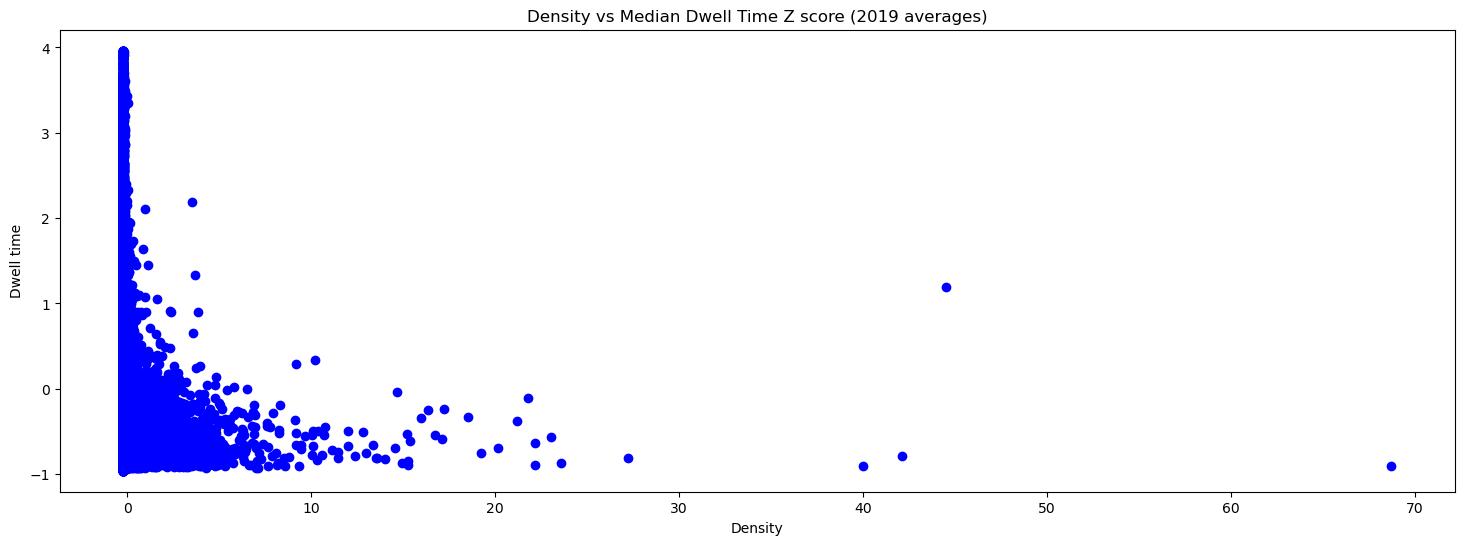

In [69]:
plt.figure(figsize=(18,6))
plt.plot(X_standardized[:,0], X_standardized[:,1], 'bo')
plt.xlabel('Density')
plt.ylabel('Dwell time')
plt.title('Density vs Median Dwell Time Z score (2019 averages)')

In [ ]:
import pymc3 as pm

### Kmeans

In [138]:
from sklearn.cluster import KMeans
from tqdm import tqdm


distortions = []
for K in tqdm(range(2, 15, 1)):
    print(f"Running kmeans for K={K}")
    km = KMeans(
        n_clusters=K, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X_log)
    distortions.append(km.inertia_)

  0%|          | 0/13 [00:00<?, ?it/s]

Running kmeans for K=2


  8%|▊         | 1/13 [00:00<00:03,  3.87it/s]

Running kmeans for K=3


 15%|█▌        | 2/13 [00:00<00:04,  2.53it/s]

Running kmeans for K=4


 23%|██▎       | 3/13 [00:01<00:05,  1.88it/s]

Running kmeans for K=5


 31%|███       | 4/13 [00:02<00:08,  1.11it/s]

Running kmeans for K=6


 38%|███▊      | 5/13 [00:03<00:07,  1.08it/s]

Running kmeans for K=7


 46%|████▌     | 6/13 [00:05<00:07,  1.07s/it]

Running kmeans for K=8


 54%|█████▍    | 7/13 [00:06<00:07,  1.22s/it]

Running kmeans for K=9


 62%|██████▏   | 8/13 [00:08<00:06,  1.30s/it]

Running kmeans for K=10


 69%|██████▉   | 9/13 [00:10<00:06,  1.57s/it]

Running kmeans for K=11


 77%|███████▋  | 10/13 [00:13<00:05,  1.90s/it]

Running kmeans for K=12


 85%|████████▍ | 11/13 [00:16<00:04,  2.23s/it]

Running kmeans for K=13


 92%|█████████▏| 12/13 [00:19<00:02,  2.61s/it]

Running kmeans for K=14


100%|██████████| 13/13 [00:22<00:00,  1.77s/it]


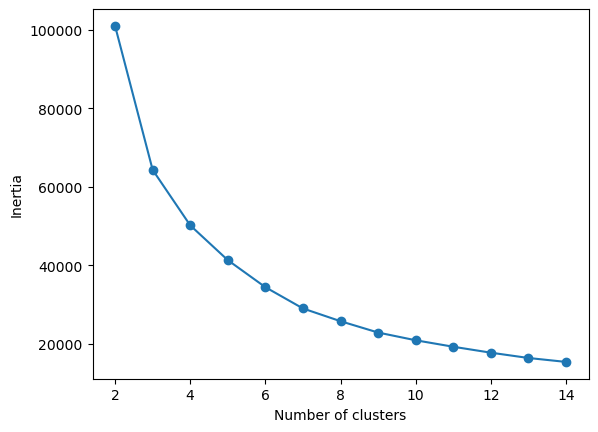

In [140]:
# plot
plt.plot(range(2, 15, 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
plt.plot(range(2, 15, 1), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Inertia

$$
\text{inertia} = \sum_{i=0}^n \min _{\mu_j \in C}\left(\left\|x_i-\mu_j\right\|^2\right)
$$

In [141]:
K_best = 7

km = KMeans(
    n_clusters=K_best,
    init='random',
    random_state=0
)
y_km = km.fit_predict(X_log)

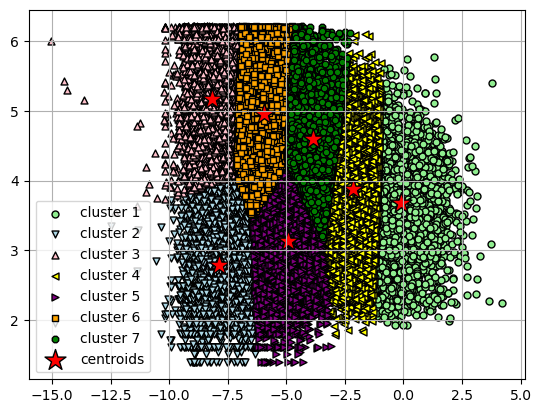

In [143]:
marker = ['o', 'v', '^', '<', '>', 's', '8', 'p']

color = ['lightgreen', 'lightblue', 'pink', 'yellow', 'purple', 'orange', 'green']


for k in range(K_best):
    plt.scatter(
        X_log.loc[y_km == k, 'density'], X_log.loc[y_km == k, 'median_dwell'],
        s=25, c=color[k],
        marker=marker[k], edgecolor='black',
        label=f'cluster {k+1}'
    )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [78]:
slice = (X_standardized[:,0] < 10)

X_zoom = X_standardized[slice, :]
y_zoom = y_km[slice]

In [79]:
km.cluster_centers_[1:, 0]

array([-0.15218001, -0.03492831, -0.21360141, 21.08580554,  3.50785248])

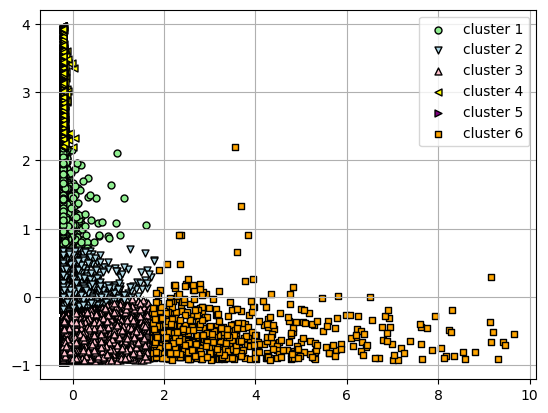

In [81]:
for k in range(K_best):
    plt.scatter(
        X_zoom[y_zoom == k, 0], X_zoom[y_zoom == k, 1],
        s=25, c=color[k],
        marker=marker[k], edgecolor='black',
        label=f'cluster {k+1}'
    )

# plot the centroids
# plt.scatter(
#     km.cluster_centers_[1:, 0], km.cluster_centers_[1:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [144]:
df_2019_mean['cluster'] = y_km

In [145]:
df_2019_mean = df_2019_mean.reset_index()

In [146]:
df_2019 = df_2019.merge(df_2019_mean[['node.placekey','cluster']], left_on='node.placekey', right_on='node.placekey')

In [147]:
df_2019.head()

,node.placekey,node.safegraph_core.naics_code,node.safegraph_core.location_name,node.safegraph_core.top_category,node.safegraph_core.sub_category,node.safegraph_geometry.wkt_area_sq_meters,day_0_visits,day_1_visits,day_2_visits,day_3_visits,...,11-20,21-60,61-120,121-240,>240,start,end,density,cluster_x,cluster_y
0,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,5.0,4.0,8.0,6.0,...,19.0,5.0,3.0,3.0,3.0,2019-01-07,2019-01-07,0.647887,2,0
1,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,6.0,7.0,4.0,8.0,...,16.0,6.0,5.0,3.0,4.0,2019-01-14,2019-01-14,0.605634,2,0
2,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,2.0,6.0,8.0,12.0,...,30.0,6.0,4.0,4.0,5.0,2019-01-21,2019-01-21,0.816901,2,0
3,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,5.0,10.0,7.0,5.0,...,13.0,13.0,2.0,5.0,3.0,2019-01-28,2019-01-28,0.690141,2,0
4,22p-222@627-s4w-3dv,446120,MAC Cosmetics,Health and Personal Care Stores,"Cosmetics, Beauty Supplies, and Perfume Stores",71.0,10.0,6.0,4.0,12.0,...,14.0,5.0,2.0,4.0,5.0,2019-02-04,2019-02-04,0.605634,2,0


In [149]:
df_2019.groupby(['cluster_y','node.safegraph_core.naics_code','node.safegraph_core.top_category','node.safegraph_core.sub_category'])['cluster_y'].count().to_csv('cluster_counts.csv')

In [150]:
len(df_2019['node.placekey'].unique())

32882

<AxesSubplot:xlabel='start'>

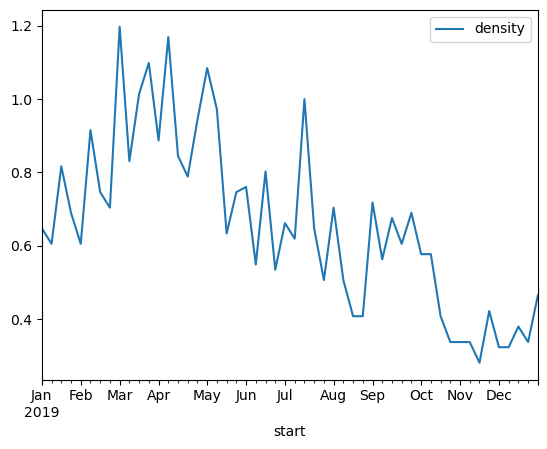

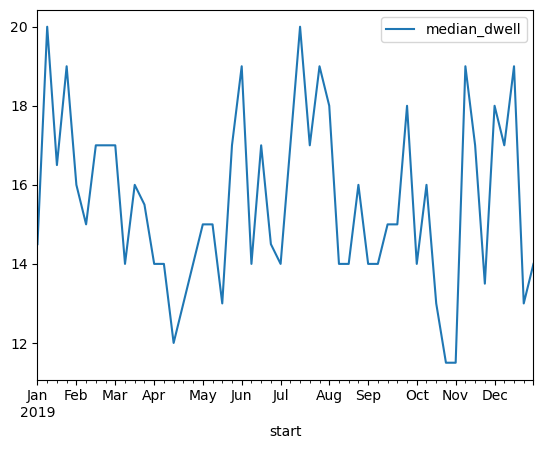

In [116]:
df_slice = df_2019.loc[df_2019['node.placekey'] == '22p-222@627-s4w-3dv',['start','density','median_dwell']]
df_slice.plot('start','density')
df_slice.plot('start','median_dwell')

In [180]:
df_naics = df_2019.groupby(['node.safegraph_core.naics_code','node.safegraph_core.top_category','node.safegraph_core.sub_category'])['density','median_dwell'].mean().reset_index()

C:\Users\hyone\AppData\Local\Temp\ipykernel_31288\3521103204.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_naics = df_2019.groupby(['node.safegraph_core.naics_code','node.safegraph_core.top_category','node.safegraph_core.sub_category'])['density','median_dwell'].mean().reset_index()


In [181]:
df_naics['log_density'] = np.log(df_naics['density'])
df_naics['log_median_dwell'] = np.log(df_naics['median_dwell'])

In [154]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_naics[['log_density','log_median_dwell']])

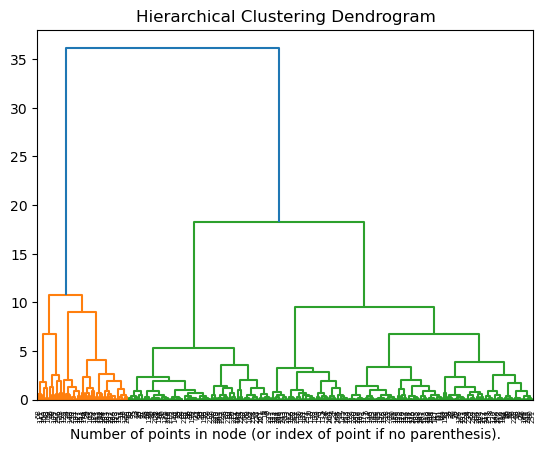

In [162]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=10)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [158]:
max(model.labels_)

260

In [166]:
children_df = pd.DataFrame(model.children_)

In [167]:
children_df

,0,1
0,82,89
1,116,237
2,161,250
3,30,108
4,238,242
...,...,...
255,500,512
256,508,514
257,515,516
258,513,517


In [170]:
df_naics.iloc[82,:]

node.safegraph_core.naics_code       451211
density                            0.154205
median_dwell                      64.117114
log_density                       -1.869472
log_median_dwell                   4.160711
Name: 82, dtype: object

In [171]:
df_naics.iloc[89,:]

node.safegraph_core.naics_code       453310
density                            0.152942
median_dwell                      64.112327
log_density                       -1.877699
log_median_dwell                   4.160637
Name: 89, dtype: object

In [178]:
df_2019.loc[df_2019['node.safegraph_core.naics_code'] == '453310',['node.safegraph_core.top_category','node.safegraph_core.sub_category']]

,node.safegraph_core.top_category,node.safegraph_core.sub_category
2686,Used Merchandise Stores,Used Merchandise Stores
2687,Used Merchandise Stores,Used Merchandise Stores
2688,Used Merchandise Stores,Used Merchandise Stores
2689,Used Merchandise Stores,Used Merchandise Stores
2690,Used Merchandise Stores,Used Merchandise Stores
...,...,...
1325563,Used Merchandise Stores,Used Merchandise Stores
1325564,Used Merchandise Stores,Used Merchandise Stores
1327867,Used Merchandise Stores,Used Merchandise Stores
1327868,Used Merchandise Stores,Used Merchandise Stores


In [182]:
df_naics

,node.safegraph_core.naics_code,node.safegraph_core.top_category,node.safegraph_core.sub_category,density,median_dwell,log_density,log_median_dwell
0,111421,"Greenhouse, Nursery, and Floriculture Production",Nursery and Tree Production,0.018919,77.263052,-3.967590,4.347216
1,221111,"Electric Power Generation, Transmission and Di...",Hydroelectric Power Generation,0.010172,57.032000,-4.588158,4.043613
2,221112,"Electric Power Generation, Transmission and Di...",Fossil Fuel Electric Power Generation,0.013317,60.980519,-4.318697,4.110554
3,236118,Residential Building Construction,Residential Remodelers,0.107309,23.651786,-2.232043,3.163439
4,238150,"Foundation, Structure, and Building Exterior C...",Glass and Glazing Contractors,0.006958,125.033724,-4.967854,4.828583
...,...,...,...,...,...,...,...
222,922140,"Justice, Public Order, and Safety Activities",Correctional Institutions,0.018290,101.238916,-4.001376,4.617483
223,922160,"Justice, Public Order, and Safety Activities",Fire Protection,0.016034,122.385052,-4.133059,4.807172
224,922190,"Justice, Public Order, and Safety Activities","Other Justice, Public Order, and Safety Activi...",0.000108,13.596154,-9.132135,2.609787
225,926120,Administration of Economic Programs,Regulation and Administration of Transportatio...,0.042093,63.673246,-3.167871,4.153764


In [185]:
import plotly.express as px
import plotly.graph_objects as go

In [187]:
fig = go.Figure(data=go.Scatter(x=df_naics['log_density'],
                                y=df_naics['log_median_dwell'],
                                mode='markers',
                                text=df_naics['node.safegraph_core.sub_category'])) # hover text goes here

fig.show()